In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import sklearn as sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
import pandas as pd
data = pd.read_csv('../Data/cleaned_tweets.csv')

In [3]:
data.head(5)

,Unnamed: 0,id,entity,sentiment,tweet
0,0,2401,Borderlands,Positive,"['im', 'get', 'borderland', 'murder']"
1,1,2401,Borderlands,Positive,"['come', 'border', 'kill']"
2,2,2401,Borderlands,Positive,"['im', 'get', 'borderland', 'kill']"
3,3,2401,Borderlands,Positive,"['im', 'come', 'borderland', 'murder']"
4,4,2401,Borderlands,Positive,"['im', 'get', 'borderland', '2', 'murder']"


In [4]:
print(data.shape)
print(data.info())

(43013, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43013 entries, 0 to 43012
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  43013 non-null  int64 
 1   id          43013 non-null  int64 
 2   entity      43013 non-null  object
 3   sentiment   43013 non-null  object
 4   tweet       43013 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.6+ MB
None


In [5]:
data.sentiment.unique()


array(['Positive', 'Negative'], dtype=object)

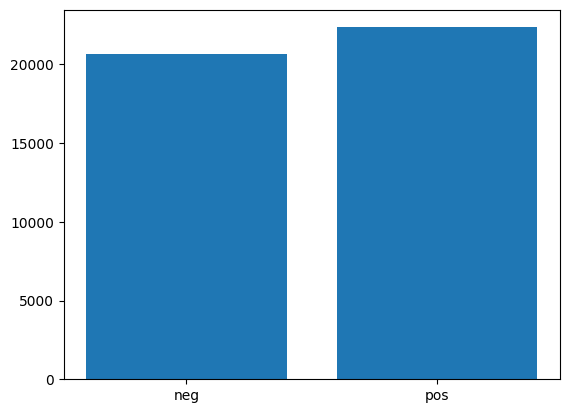

In [6]:
classes = data.sentiment.unique()
counts = []
for i in classes:
    count = len(data[data.sentiment == i])
    counts.append(count)
plt.bar(['neg', 'pos'], counts)
plt.show()


In [7]:
#sb.pairplot(data)


In [8]:
x = data.tweet.values
y = data.sentiment.values
len(x)

43013

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42,test_size= 0.2)
'''
random state 42 = random number for spliiting

'''

'\nrandom state 42 = random number for spliiting\n\n'

In [10]:
'''print(x_train.shape)
print(x_test.shape)
print (x_test.describe())
print(x_train.dtype)
print(y_train)'''


'print(x_train.shape)\nprint(x_test.shape)\nprint (x_test.describe())\nprint(x_train.dtype)\nprint(y_train)'

In [11]:
vectorizer = CountVectorizer() 
vectorizer.fit(x_train)

vectorizer.fit(x_test)
x_train = vectorizer.transform(x_train)
x_test = vectorizer.transform(x_test)
'''
'''

'\n'

In [12]:
print("before vec; ", x_train[0], "  after vec : ", x_train[0])


before vec;    (0, 2820)	1
  (0, 3516)	1
  (0, 3961)	1
  (0, 5128)	1
  (0, 5784)	1
  (0, 6002)	1
  (0, 6014)	1
  (0, 9208)	1   after vec :    (0, 2820)	1
  (0, 3516)	1
  (0, 3961)	1
  (0, 5128)	1
  (0, 5784)	1
  (0, 6002)	1
  (0, 6014)	1
  (0, 9208)	1


In [13]:
classifier = LogisticRegression (max_iter=1000)
classifier.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [14]:
score = classifier.score(x_test, y_test)
print("accuracy", score)


accuracy 0.8935255143554574


In [15]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred, labels=data.sentiment.unique())
data_cm = pd.DataFrame(cm, index=data.sentiment.unique(),
                       columns=data.sentiment.unique())
data_cm


,Positive,Negative
Positive,3638,498
Negative,418,4049


In [16]:
data_cm_percentage = data_cm.copy()
for i in data_cm_percentage:
    data_cm_percentage[i] = data_cm_percentage[i] / data_cm_percentage[i].sum()

data_cm_percentage


,Positive,Negative
Positive,0.896943,0.109523
Negative,0.103057,0.890477


In [17]:
x_test

<8603x9394 sparse matrix of type '<class 'numpy.int64'>'
	with 85734 stored elements in Compressed Sparse Row format>

In [18]:
tweet = "you are perfect"
vectTweet =  vectorizer.transform(np.array([tweet ])) #vectorize the tweet using the vectorizer 
prediction = classifier.predict(vectTweet) #to predict the class of the tweet 
print('Tweet is','positive' if prediction[0]== "Positive" else 'negative')

Tweet is positive


In [19]:
x_train


<34410x9394 sparse matrix of type '<class 'numpy.int64'>'
	with 320887 stored elements in Compressed Sparse Row format>

In [20]:
'''modelLogistic = LogisticRegression()
modelLogistic.fit(x_train,y_train)'''


'modelLogistic = LogisticRegression()\nmodelLogistic.fit(x_train,y_train)'

In [21]:
''' LCs - longest common subsequence'''

' LCs - longest common subsequence'